In [95]:
# Importing required libraries
import pandas as pd
import math
# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.express as px
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [96]:
# Read the csv file
df=pd.read_csv("../Resources/Project_Indicators_Wide.csv")
df.head()

,country_code,country,region,status,year,ALC,AMR,BCG,CANP,DTP,...,HDI,HE,INCI,INFMR,LE,MCV,OBP,POPD,POPG,SR
0,ABW,Aruba,Latin America & Caribbean,NaN,2000,NaN,112.4760,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.787,NaN,NaN,504.811111,2.064841,93.3
1,ABW,Aruba,Latin America & Caribbean,NaN,2001,NaN,111.9155,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.853,NaN,NaN,516.066667,2.205163,93.3
2,ABW,Aruba,Latin America & Caribbean,NaN,2002,NaN,111.3550,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,73.937,NaN,NaN,527.733333,2.235515,93.3
3,ABW,Aruba,Latin America & Caribbean,NaN,2003,NaN,109.9290,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74.038,NaN,NaN,538.977778,2.108324,93.3
4,ABW,Aruba,Latin America & Caribbean,NaN,2004,NaN,108.5030,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74.156,NaN,NaN,548.577778,1.765473,93.3


In [97]:
# Dropping NA's
df=df.dropna()
df.head()

,country_code,country,region,status,year,ALC,AMR,BCG,CANP,DTP,...,HDI,HE,INCI,INFMR,LE,MCV,OBP,POPD,POPG,SR
20,AFG,Afghanistan,South Asia,Developing,2000,0.002667,310.8305,30.0,0.502297,48.0,...,0.350,9.0,0.333,90.5,55.841,27.0,2.3,31.829117,2.975057,105.9
21,AFG,Afghanistan,South Asia,Developing,2001,0.005333,304.8580,43.0,0.508536,59.0,...,0.353,9.0,0.318,87.9,56.308,37.0,2.4,33.095904,3.902805,105.9
22,AFG,Afghanistan,South Asia,Developing,2002,0.008000,298.8855,46.0,0.512110,62.0,...,0.384,9.0,0.386,85.3,56.784,35.0,2.6,34.618102,4.496719,105.9
23,AFG,Afghanistan,South Asia,Developing,2003,0.010667,292.0365,44.0,0.515965,66.0,...,0.393,9.0,0.391,82.7,57.271,39.0,2.7,36.272510,4.668344,105.9
24,AFG,Afghanistan,South Asia,Developing,2004,0.013333,285.1880,51.0,0.520604,72.0,...,0.409,10.0,0.389,80.0,57.772,48.0,2.9,37.874413,4.321560,105.9


In [98]:
# Checking data types
df.dtypes

country_code     object
country          object
region           object
status           object
year              int64
ALC             float64
AMR             float64
BCG             float64
CANP            float64
DTP             float64
EDI             float64
GDP             float64
GDPG            float64
HDI             float64
HE              float64
INCI            float64
INFMR           float64
LE              float64
MCV             float64
OBP             float64
POPD            float64
POPG            float64
SR              float64
dtype: object

In [99]:
# Dropping unwanted columns for graphical analysis
select_df=df.drop(columns=["country_code","country","year","status"])
select_df.head()

,region,ALC,AMR,BCG,CANP,DTP,EDI,GDP,GDPG,HDI,HE,INCI,INFMR,LE,MCV,OBP,POPD,POPG,SR
20,South Asia,0.002667,310.8305,30.0,0.502297,48.0,0.235,4.055180e+09,3.868380,0.350,9.0,0.333,90.5,55.841,27.0,2.3,31.829117,2.975057,105.9
21,South Asia,0.005333,304.8580,43.0,0.508536,59.0,0.247,4.055180e+09,3.868380,0.353,9.0,0.318,87.9,56.308,37.0,2.4,33.095904,3.902805,105.9
22,South Asia,0.008000,298.8855,46.0,0.512110,62.0,0.259,4.055180e+09,3.868380,0.384,9.0,0.386,85.3,56.784,35.0,2.6,34.618102,4.496719,105.9
23,South Asia,0.010667,292.0365,44.0,0.515965,66.0,0.271,4.515559e+09,3.868380,0.393,9.0,0.391,82.7,57.271,39.0,2.7,36.272510,4.668344,105.9
24,South Asia,0.013333,285.1880,51.0,0.520604,72.0,0.302,5.226779e+09,-2.875203,0.409,10.0,0.389,80.0,57.772,48.0,2.9,37.874413,4.321560,105.9


## Graphical Analysis

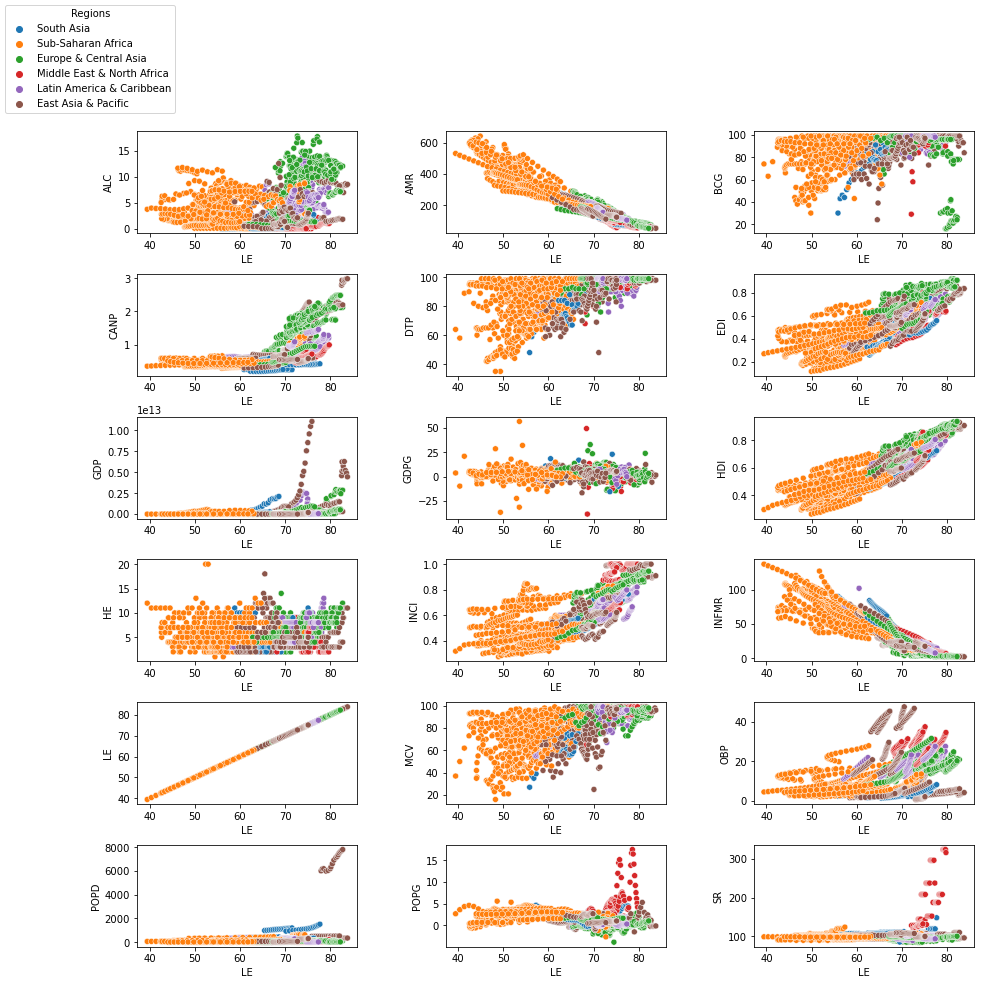

In [100]:
# Scatterplots comparing features with life expectancy
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for x,column in enumerate(select_df.columns.difference(['region'])):
    i=math.floor(x/3)
    j=x%3
    plot=sns.scatterplot(ax=axes[i,j],x=select_df['LE'], y= select_df[column],data=select_df,hue=select_df['region'])
    handles, labels = axes[0,0].get_legend_handles_labels()  
    axes[i,j].get_legend().remove()
fig.legend(handles, labels, loc = 'upper left',title="Regions")
plt.savefig("../Images/Plots/Scatter_plot.png")

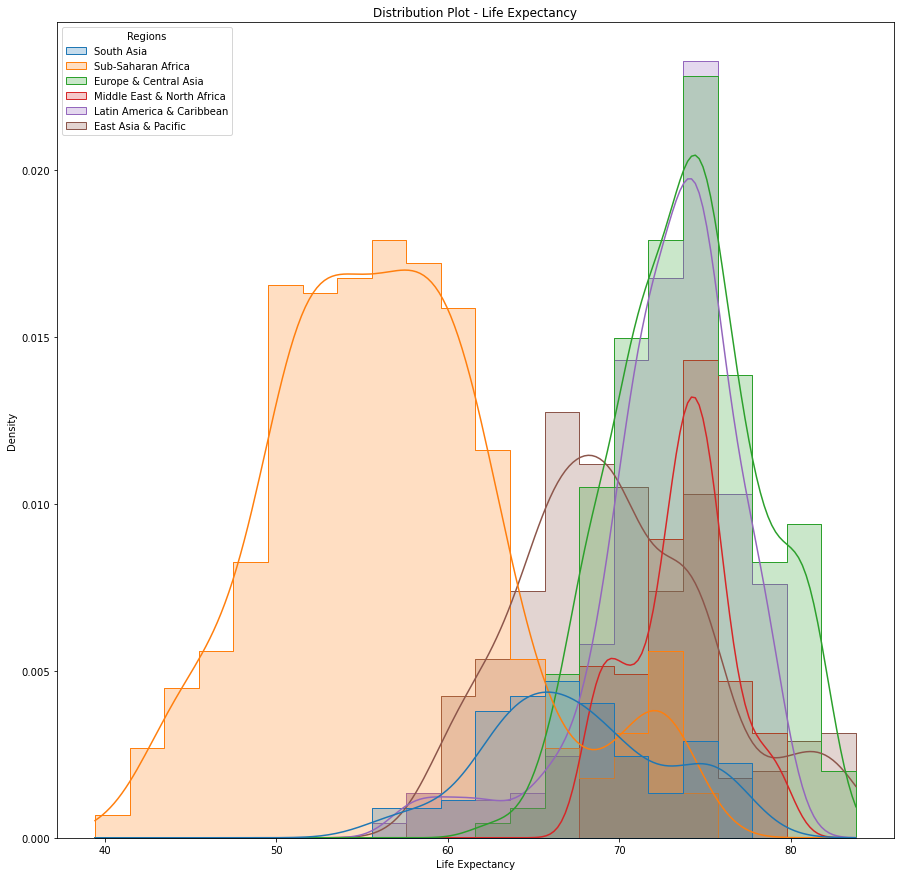

In [101]:
# Distribution plot for life expectancy
fig, ax = plt.subplots(figsize=(15, 15))
sns.histplot(data=select_df,x='LE',hue='region',element='step',stat='density',kde=True)
ax.set_xlabel("Life Expectancy")
ax.set_title('Distribution Plot - Life Expectancy')
sns.move_legend(ax,'upper left', title="Regions")
plt.savefig("../Images/Plots/Distribution_plot.png")

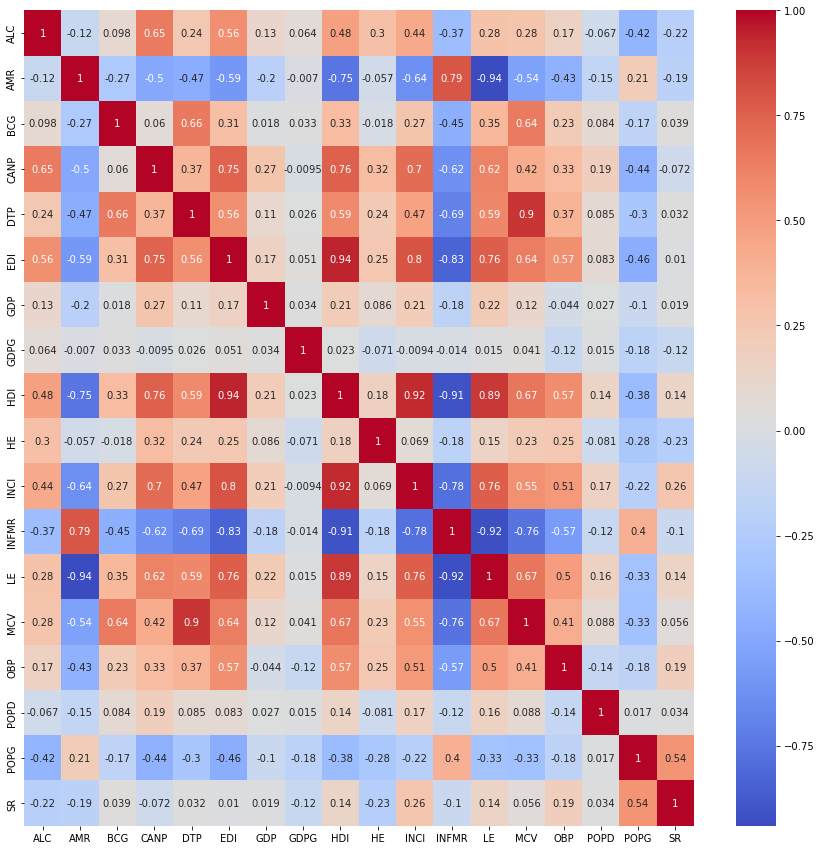

In [102]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(select_df.corr(),cmap='coolwarm',annot=True)
plt.savefig("../Images/Plots/Correlation_matrix.png")

## Multiple Linear Regression 

### Model to predict life expectancy

In [103]:
# Defining features and target- Features dropped based on statistical analysis
y=select_df["LE"]
X=select_df.drop(columns=["LE","region","ALC","BCG","DTP","GDPG","POPD","SR"])

In [104]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [105]:
# Normalize the data
X_scaler=MinMaxScaler().fit(X_train)
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [106]:
# Fitting the model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [107]:
# Predicting the life expectancy values
y_pred=lm.predict(X_test_scaled)

In [108]:
# Performance of the model

from sklearn.metrics import r2_score,mean_squared_error

print (f"The coefficient of determination is {r2_score(y_test,y_pred):.3f}")
print (f"The mean squared error is {mean_squared_error(y_test,y_pred):.3f}")

The coefficient of determination is 0.995
The mean squared error is 0.462


In [109]:
# Training and Testing scores

training_score=lm.score(X_train_scaled,y_train)
testing_score=lm.score(X_test_scaled,y_test)

print(f"Training Score: {training_score:.3f}")
print(f"Testing Score: {testing_score:.3f}")

Training Score: 0.994
Testing Score: 0.995


Text(0, 0.5, 'Residuals')

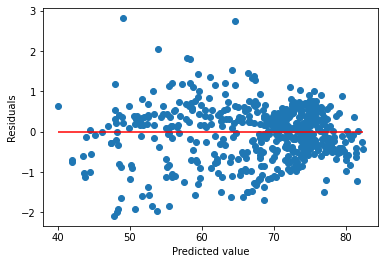

In [110]:
# Plotting the residuals
plt.scatter(y_pred,y_pred-y_test)
plt.hlines(y=0,xmin=y_pred.min(),xmax=y_pred.max(),color='red')
plt.xlabel("Predicted value")
plt.ylabel("Residuals")

In [111]:
# Calculating the intercept
print(f"The intercept is {lm.intercept_:.3f}")

The intercept is 58.169


In [112]:
# Calculating the coefficients
print("The coefficients are:")
for item in zip(X.columns,lm.coef_):
    print(f"{item[0]}: {item[1]:.3f}")

The coefficients are:
AMR: -8.196
CANP: 0.385
EDI: -45.677
GDP: -0.161
HDI: 99.666
HE: 0.682
INCI: -34.358
INFMR: -5.100
MCV: 0.132
OBP: -0.471
POPG: 0.412


## Logistic Regression

### Model to predict country's status

In [113]:
# Defining feature and target
y_s=df["status"]
X_s=df.drop(columns=["country","year","status","region","country_code"])

In [114]:
# Splitting the data
X_s_train,X_s_test,y_s_train,y_s_test=train_test_split(X_s,y_s,random_state=42)

In [115]:
# Standardizing the data
X_scaler=MinMaxScaler().fit(X_s_train)
X_s_train_scaled=X_scaler.transform(X_s_train)
X_s_test_scaled=X_scaler.transform(X_s_test)

In [116]:
# Fitting the model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',random_state=42)
lr.fit(X_s_train_scaled,y_s_train)

LogisticRegression(random_state=42)

In [117]:
# Predicting the target for test
predicted_status_lr=lr.predict(X_s_test_scaled)

In [118]:
# Metrics
print(f"The accuracy of the model is : {accuracy_score(y_s_test,predicted_status_lr):.3f}\n")
print("The confusion matrix is as follows:")
print(confusion_matrix(y_s_test,predicted_status_lr))
print("\nThe classification report is as follows:")
print(classification_report(y_s_test,predicted_status_lr))

The accuracy of the model is : 0.950

The confusion matrix is as follows:
[[ 46  10]
 [ 18 481]]

The classification report is as follows:
              precision    recall  f1-score   support

   Developed       0.72      0.82      0.77        56
  Developing       0.98      0.96      0.97       499

    accuracy                           0.95       555
   macro avg       0.85      0.89      0.87       555
weighted avg       0.95      0.95      0.95       555



## Random Forest

### Model to predict country's status

In [119]:
# Fitting the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_s_train_scaled,y_s_train)

RandomForestClassifier(random_state=42)

In [120]:
# Predicting the target for test
predicted_status_rf=rfc.predict(X_s_test_scaled)

In [121]:
# Metrics
print(f"The accuracy of the model is : {accuracy_score(y_s_test,predicted_status_rf):.3f}\n")
print("The confusion matrix is as follows:")
print(confusion_matrix(y_s_test,predicted_status_rf))
print("\nThe classification report is as follows:")
print(classification_report(y_s_test,predicted_status_rf))

The accuracy of the model is : 1.000

The confusion matrix is as follows:
[[ 56   0]
 [  0 499]]

The classification report is as follows:
              precision    recall  f1-score   support

   Developed       1.00      1.00      1.00        56
  Developing       1.00      1.00      1.00       499

    accuracy                           1.00       555
   macro avg       1.00      1.00      1.00       555
weighted avg       1.00      1.00      1.00       555



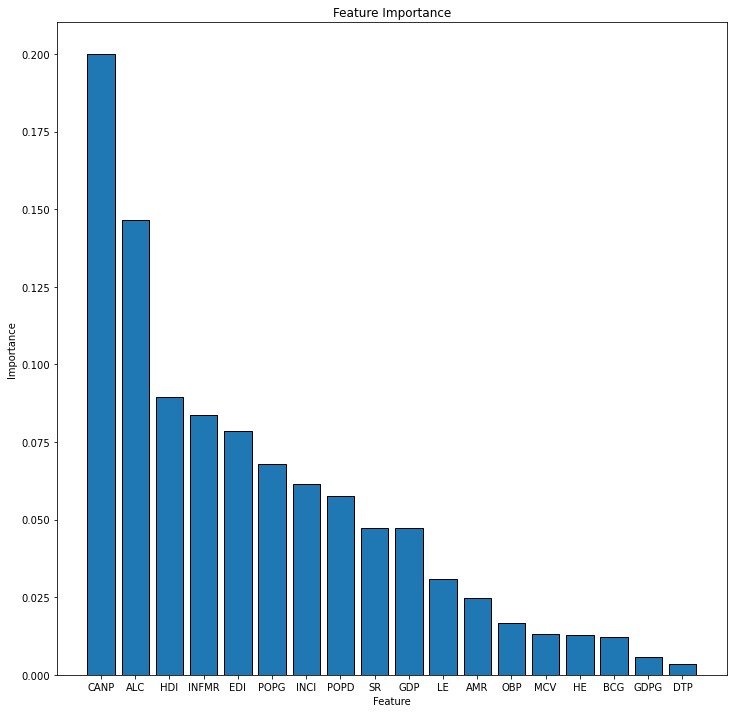

In [122]:
# Feature importance
sort_list=sorted(zip(X_s.columns,rfc.feature_importances_),key=lambda x: x[1],reverse=True)
labels, values = zip(*sort_list)
indexes = np.arange(len(labels))
width = 1
fig, ax = plt.subplots(figsize=(12, 12))
plt.bar(indexes,values,linewidth=1,tick_label=labels,edgecolor="black")
ax.set(title="Feature Importance",xlabel="Feature",ylabel="Importance")
plt.savefig("../Images/Plots/Bar_Plot.png")

## KMeans Clustering

### Studying clusters in data

In [123]:
# Reindexing dataframe
df=df.reset_index(drop=True)

In [124]:
# Tranforming country status to numerical format
onc=OneHotEncoder(sparse=False)

encoded_df=pd.DataFrame(onc.fit_transform(df["status"].values.reshape(-1,1)))
encoded_df.columns=onc.get_feature_names_out(["status"])
encoded_df.tail()

,status_Developed,status_Developing
2212,0.0,1.0
2213,0.0,1.0
2214,0.0,1.0
2215,0.0,1.0
2216,0.0,1.0


In [125]:
# Merging the dataframes
cluster_df=df.join(encoded_df)
cluster_df.head()

,country_code,country,region,status,year,ALC,AMR,BCG,CANP,DTP,...,INCI,INFMR,LE,MCV,OBP,POPD,POPG,SR,status_Developed,status_Developing
0,AFG,Afghanistan,South Asia,Developing,2000,0.002667,310.8305,30.0,0.502297,48.0,...,0.333,90.5,55.841,27.0,2.3,31.829117,2.975057,105.9,0.0,1.0
1,AFG,Afghanistan,South Asia,Developing,2001,0.005333,304.8580,43.0,0.508536,59.0,...,0.318,87.9,56.308,37.0,2.4,33.095904,3.902805,105.9,0.0,1.0
2,AFG,Afghanistan,South Asia,Developing,2002,0.008000,298.8855,46.0,0.512110,62.0,...,0.386,85.3,56.784,35.0,2.6,34.618102,4.496719,105.9,0.0,1.0
3,AFG,Afghanistan,South Asia,Developing,2003,0.010667,292.0365,44.0,0.515965,66.0,...,0.391,82.7,57.271,39.0,2.7,36.272510,4.668344,105.9,0.0,1.0
4,AFG,Afghanistan,South Asia,Developing,2004,0.013333,285.1880,51.0,0.520604,72.0,...,0.389,80.0,57.772,48.0,2.9,37.874413,4.321560,105.9,0.0,1.0


In [126]:
# Dropping unwanted columns
cluster_df.drop(columns=["country","year","status","country_code","region"],inplace=True)
cluster_df.head()

,ALC,AMR,BCG,CANP,DTP,EDI,GDP,GDPG,HDI,HE,INCI,INFMR,LE,MCV,OBP,POPD,POPG,SR,status_Developed,status_Developing
0,0.002667,310.8305,30.0,0.502297,48.0,0.235,4.055180e+09,3.868380,0.350,9.0,0.333,90.5,55.841,27.0,2.3,31.829117,2.975057,105.9,0.0,1.0
1,0.005333,304.8580,43.0,0.508536,59.0,0.247,4.055180e+09,3.868380,0.353,9.0,0.318,87.9,56.308,37.0,2.4,33.095904,3.902805,105.9,0.0,1.0
2,0.008000,298.8855,46.0,0.512110,62.0,0.259,4.055180e+09,3.868380,0.384,9.0,0.386,85.3,56.784,35.0,2.6,34.618102,4.496719,105.9,0.0,1.0
3,0.010667,292.0365,44.0,0.515965,66.0,0.271,4.515559e+09,3.868380,0.393,9.0,0.391,82.7,57.271,39.0,2.7,36.272510,4.668344,105.9,0.0,1.0
4,0.013333,285.1880,51.0,0.520604,72.0,0.302,5.226779e+09,-2.875203,0.409,10.0,0.389,80.0,57.772,48.0,2.9,37.874413,4.321560,105.9,0.0,1.0


In [127]:
# Checking data types
cluster_df.dtypes

ALC                  float64
AMR                  float64
BCG                  float64
CANP                 float64
DTP                  float64
EDI                  float64
GDP                  float64
GDPG                 float64
HDI                  float64
HE                   float64
INCI                 float64
INFMR                float64
LE                   float64
MCV                  float64
OBP                  float64
POPD                 float64
POPG                 float64
SR                   float64
status_Developed     float64
status_Developing    float64
dtype: object

In [128]:
# Scaling the data
cluster_scaled=MinMaxScaler().fit_transform(cluster_df)

In [129]:
# Applying PCA to reduce dimensions from 21 to 4
from sklearn.decomposition import PCA

pca=PCA(n_components=4)
cluster_pca=pca.fit_transform(cluster_scaled)

In [130]:
# Checking the explained variance ratio - Variables will be adjusted to use fewer parameters in next iteration
pca.explained_variance_ratio_

array([0.53456714, 0.20126763, 0.0589989 , 0.05359823])

In [131]:
# Adding pca values to df

pca_df=pd.DataFrame(cluster_pca,columns=["PC1","PC2","PC3","PC4"])

<AxesSubplot:xlabel='Number of clusters', ylabel='Inertia'>

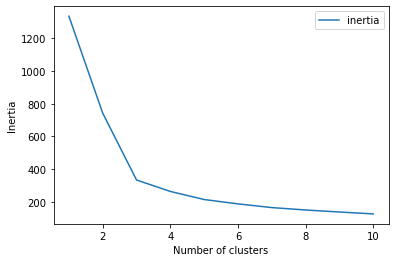

In [132]:
# Identifying best value for k

from sklearn.cluster import KMeans

inertia=[]
k = list(range(1,11))

# Looping through definined k options
for value in k:
    km = KMeans(n_clusters=value,random_state=42)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
# Elbow curve
elbow_df=pd.DataFrame({"k":k,"inertia":inertia})

elbow_df.plot(x="k",y="inertia",xlabel="Number of clusters",ylabel="Inertia")

In [133]:
# KMeans Clustering for 3 clusters
kmodel=KMeans(n_clusters=3,random_state=42)
kmodel.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [134]:
# Predicting the cluster
cluster=kmodel.predict(pca_df)

pca_df["class"]=kmodel.labels_
pca_df.head()

,PC1,PC2,PC3,PC4,class
0,-1.128039,0.714938,0.684559,0.105318,0
1,-1.053151,0.611978,0.480665,0.029217,0
2,-0.988180,0.566578,0.493591,0.035082,0
3,-0.946992,0.532654,0.463902,0.020233,0
4,-0.867272,0.453745,0.333852,-0.006957,0


In [135]:
# Merging results with main dataset
combined_df=df.join(pca_df)
combined_df.head()

,country_code,country,region,status,year,ALC,AMR,BCG,CANP,DTP,...,MCV,OBP,POPD,POPG,SR,PC1,PC2,PC3,PC4,class
0,AFG,Afghanistan,South Asia,Developing,2000,0.002667,310.8305,30.0,0.502297,48.0,...,27.0,2.3,31.829117,2.975057,105.9,-1.128039,0.714938,0.684559,0.105318,0
1,AFG,Afghanistan,South Asia,Developing,2001,0.005333,304.8580,43.0,0.508536,59.0,...,37.0,2.4,33.095904,3.902805,105.9,-1.053151,0.611978,0.480665,0.029217,0
2,AFG,Afghanistan,South Asia,Developing,2002,0.008000,298.8855,46.0,0.512110,62.0,...,35.0,2.6,34.618102,4.496719,105.9,-0.988180,0.566578,0.493591,0.035082,0
3,AFG,Afghanistan,South Asia,Developing,2003,0.010667,292.0365,44.0,0.515965,66.0,...,39.0,2.7,36.272510,4.668344,105.9,-0.946992,0.532654,0.463902,0.020233,0
4,AFG,Afghanistan,South Asia,Developing,2004,0.013333,285.1880,51.0,0.520604,72.0,...,48.0,2.9,37.874413,4.321560,105.9,-0.867272,0.453745,0.333852,-0.006957,0


In [136]:
# Plot to visualize cluster
combined_df.hvplot.scatter(x="PC1",y="PC2",by="class",hover_cols=["country","year"])

:NdOverlay   [class]
   :Scatter   [PC1]   (PC2,country,year)

In [156]:
# 3D plot to visualize data
fig=px.scatter_3d(combined_df,
                 x="PC1",
                 y="PC2",
                 z="year",
                 color="class",
                 symbol="status",
                 hover_name="country",
                 hover_data=["region","year","status","LE"],                
                 width=1000,
                 height=1000
                 )
fig.update_traces(
        marker_size=6,
        marker_line=dict(width=1, color='darkgrey'),
        selector=dict(mode='markers'))
fig.update_layout(legend={"x":0,"y":1})
fig.show()


In [139]:
# Region based classification to understand differences
class_df=combined_df.groupby(["region","class"])[["region"]].count()
print(class_df.to_string())

                                  region
region                     class        
East Asia & Pacific        0          99
                           1         235
                           2          25
Europe & Central Asia      0           5
                           1         261
                           2         208
Latin America & Caribbean  0          16
                           1         368
Middle East & North Africa 1         184
South Asia                 0          78
                           1          50
Sub-Saharan Africa         0         599
                           1          89
